In [ ]:
import os.path
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from pathlib import Path
from tqdm import tqdm
from time import perf_counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display

import random

# 구글드라이브 활용한 데이터 불러오기

In [ ]:
#구글드라이브를 활용해 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 파일 경로 추출


In [ ]:
image_dir = Path('/content/drive/MyDrive/man_pic')

In [ ]:
image_dir

PosixPath('/content/drive/MyDrive/man_pic')

In [ ]:
root_file_path = os.listdir(image_dir)

In [ ]:
root_file_path

['american', 'romantic_formal', 'dandy', 'casual', 'golf', 'street', 'sports']

In [ ]:
style_file_path = Path(str(image_dir) + '/' + root_file_path[0])

In [ ]:
style_file_path

PosixPath('/content/drive/MyDrive/man_pic/american')

# 각각의 카테고리마다 90장씩 학습데이터 랜덤 추출

In [ ]:

filepaths = list(style_file_path.glob(r'**/*.jpg'))[:90]
filepaths = random.sample(filepaths, 90)
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

images_a = pd.concat([filepaths, labels], axis=1)

In [ ]:
images_a

,Filepath,Label
0,/content/drive/MyDrive/man_pic/american/29681_...,american
1,/content/drive/MyDrive/man_pic/american/28149_...,american
2,/content/drive/MyDrive/man_pic/american/31060_...,american
3,/content/drive/MyDrive/man_pic/american/29311_...,american
4,/content/drive/MyDrive/man_pic/american/29749_...,american
...,...,...
85,/content/drive/MyDrive/man_pic/american/30142_...,american
86,/content/drive/MyDrive/man_pic/american/30288_...,american
87,/content/drive/MyDrive/man_pic/american/29936_...,american
88,/content/drive/MyDrive/man_pic/american/28677_...,american


In [ ]:
style_file_path = Path(str(image_dir) + '/' + root_file_path[1])
filepaths = list(style_file_path.glob(r'**/*.jpg'))[:90]
filepaths = random.sample(filepaths, 90)
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

images_b = pd.concat([filepaths, labels], axis=1)

In [ ]:
images_b

,Filepath,Label
0,/content/drive/MyDrive/man_pic/romantic_formal...,romantic_formal
1,/content/drive/MyDrive/man_pic/romantic_formal...,romantic_formal
2,/content/drive/MyDrive/man_pic/romantic_formal...,romantic_formal
3,/content/drive/MyDrive/man_pic/romantic_formal...,romantic_formal
4,/content/drive/MyDrive/man_pic/romantic_formal...,romantic_formal
...,...,...
85,/content/drive/MyDrive/man_pic/romantic_formal...,romantic_formal
86,/content/drive/MyDrive/man_pic/romantic_formal...,romantic_formal
87,/content/drive/MyDrive/man_pic/romantic_formal...,romantic_formal
88,/content/drive/MyDrive/man_pic/romantic_formal...,romantic_formal


In [ ]:
style_file_path = Path(str(image_dir) + '/' + root_file_path[2])
filepaths = list(style_file_path.glob(r'**/*.jpg'))[:90]
filepaths = random.sample(filepaths, 90)
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

images_c = pd.concat([filepaths, labels], axis=1)

In [ ]:
style_file_path = Path(str(image_dir) + '/' + root_file_path[3])
filepaths = list(style_file_path.glob(r'**/*.jpg'))[:90]
filepaths = random.sample(filepaths, 90)
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

images_d = pd.concat([filepaths, labels], axis=1)

In [ ]:
style_file_path = Path(str(image_dir) + '/' + root_file_path[4])
filepaths = list(style_file_path.glob(r'**/*.jpg'))[:90]
filepaths = random.sample(filepaths, 90)
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

images_e = pd.concat([filepaths, labels], axis=1)

In [ ]:
style_file_path = Path(str(image_dir) + '/' + root_file_path[5])
filepaths = list(style_file_path.glob(r'**/*.jpg'))[:90]
filepaths = random.sample(filepaths, 90)
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

images_f = pd.concat([filepaths, labels], axis=1)

In [ ]:
style_file_path = Path(str(image_dir) + '/' + root_file_path[6])
filepaths = list(style_file_path.glob(r'**/*.jpg'))[:90]
filepaths = random.sample(filepaths, 90)
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

images_g = pd.concat([filepaths, labels], axis=1)

In [ ]:
images = pd.concat([images_a, images_b, images_c, images_d, images_e, images_f, images_g])

In [ ]:
images = images.reset_index()

In [ ]:
df = images

In [ ]:
df

,index,Filepath,Label
0,0,/content/drive/MyDrive/man_pic/american/29681_...,american
1,1,/content/drive/MyDrive/man_pic/american/28149_...,american
2,2,/content/drive/MyDrive/man_pic/american/31060_...,american
3,3,/content/drive/MyDrive/man_pic/american/29311_...,american
4,4,/content/drive/MyDrive/man_pic/american/29749_...,american
...,...,...,...
625,85,/content/drive/MyDrive/man_pic/sports/30834_ha...,sports
626,86,/content/drive/MyDrive/man_pic/sports/28576_ha...,sports
627,87,/content/drive/MyDrive/man_pic/sports/30578_ha...,sports
628,88,/content/drive/MyDrive/man_pic/sports/29200_ha...,sports


# Train / Test data Split

In [ ]:
print(f'Number of pictures: {df.shape[0]}\n')
print(f'Number of different labels: {len(df.Label.unique())}\n')
print(f'Labels: {df.Label.unique()}')

Number of pictures: 630

Number of different labels: 7

Labels: ['american' 'romantic_formal' 'dandy' 'casual' 'golf' 'street' 'sports']


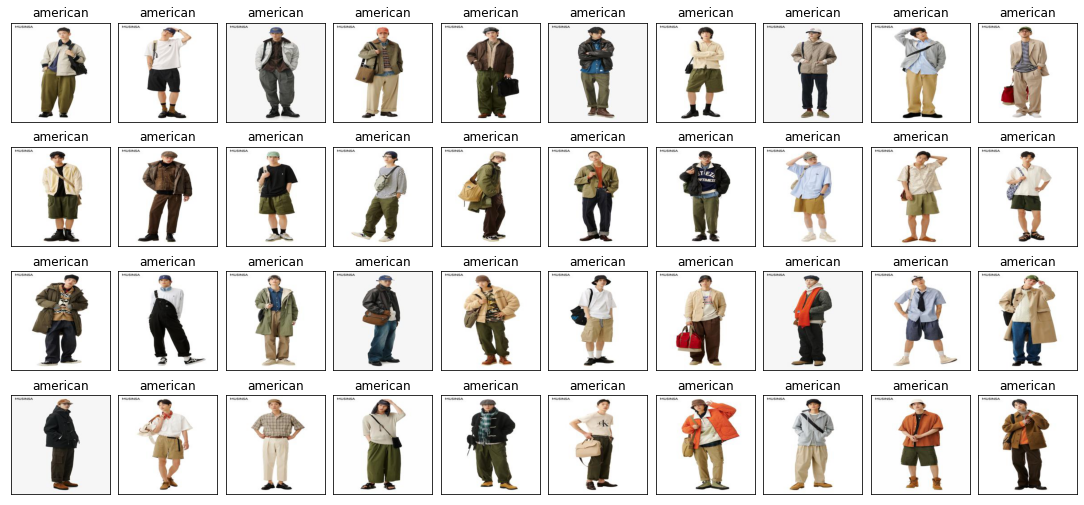

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

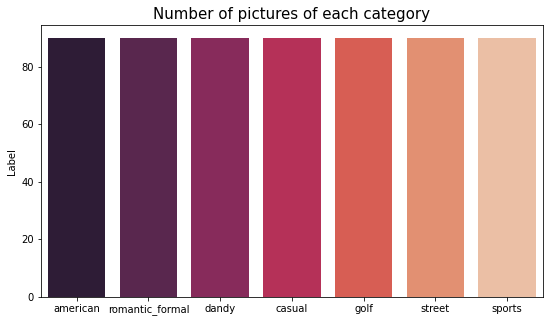

In [ ]:
vc = df['Label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
# Training/test split
# train_df,test_df = train_test_split(df.sample(frac=0.2), test_size=0.1,random_state=0) #모델링 시간이 오래걸리면 사용
train_df,test_df = train_test_split(df, test_size=0.1,random_state=0)
train_df.shape,test_df.shape

((567, 3), (63, 3))

# 학습 모델링 - 각각의 이미지를 tensor로 전환 후 학습 준비

In [ ]:
import numpy as np
import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.2)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 454 validated image filenames belonging to 7 classes.
Found 113 validated image filenames belonging to 7 classes.


# 신경망 구성 by CNN

In [ ]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=7, activation='softmax'))

# Compiling the CNN
cnn.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 41472)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
cnn.fit(x = train_gen, validation_data = val_gen, epochs = 10)

Epoch 1/10
15/15 [==============================] - 50s 3s/step - loss: 2.9014 - accuracy: 0.1432 - val_loss: 1.9312 - val_accuracy: 0.1858
Epoch 2/10
15/15 [==============================] - 14s 968ms/step - loss: 1.8600 - accuracy: 0.3106 - val_loss: 1.7449 - val_accuracy: 0.3274
Epoch 3/10
15/15 [==============================] - 17s 1s/step - loss: 1.5646 - accuracy: 0.4604 - val_loss: 1.8013 - val_accuracy: 0.3451
Epoch 4/10
15/15 [==============================] - 13s 861ms/step - loss: 1.2796 - accuracy: 0.5595 - val_loss: 1.3610 - val_accuracy: 0.4425
Epoch 5/10
15/15 [==============================] - 13s 863ms/step - loss: 0.8670 - accuracy: 0.7313 - val_loss: 1.3379 - val_accuracy: 0.4602
Epoch 6/10
15/15 [==============================] - 17s 1s/step - loss: 0.6441 - accuracy: 0.8084 - val_loss: 1.5017 - val_accuracy: 0.4602
Epoch 7/10
15/15 [==============================] - 15s 920ms/step - loss: 0.4402 - accuracy: 0.8811 - val_loss: 1.4376 - val_accuracy: 0.4867
Epoch 8/

# 추가 신경망 학습 결과 산출을 통한 최적의 신경망 추출

In [ ]:
def create_gen():
    # 생성기 및 데이터 증강으로 이미지 로드
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.1
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath', # 파일위치 열이름
        y_col='Label', # 클래스 열이름
        target_size=(224, 224), # 이미지 사이즈
        color_mode='rgb', # 이미지 채널수
        class_mode='categorical', # Y값(Label값)
        batch_size=32,
        shuffle=True, # 데이터를 섞을지 여부
        seed=0,
        subset='training', # train 인지 val인지 설정
        rotation_range=30, # 회전제한 각도 30도
        zoom_range=0.15, # 확대 축소 15%
        width_shift_range=0.2, # 좌우이동 20%
        height_shift_range=0.2, # 상하이동 20%
        shear_range=0.15, # 반시계방햐의 각도
        horizontal_flip=True, # 좌우 반전 True
        fill_mode="nearest"
        # 이미지 변경시 보완 방법 (constant, nearest, reflect, wrap) 4개 존재
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )
    
    return train_generator,test_generator,train_images,val_images,test_images

In [ ]:
models = {
    "DenseNet121": {"model":tf.keras.applications.DenseNet121, "perf":0},
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "DenseNet201": {"model":tf.keras.applications.DenseNet201, "perf":0},
    "EfficientNetB0": {"model":tf.keras.applications.EfficientNetB0, "perf":0},
    "EfficientNetB1": {"model":tf.keras.applications.EfficientNetB1, "perf":0},
    "InceptionV3": {"model":tf.keras.applications.InceptionV3, "perf":0},
    "MobileNetV2": {"model":tf.keras.applications.MobileNetV2, "perf":0},
    "MobileNetV3Large": {"model":tf.keras.applications.MobileNetV3Large, "perf":0},
    "ResNet152V2": {"model":tf.keras.applications.ResNet152V2, "perf":0},
    "ResNet50": {"model":tf.keras.applications.ResNet50, "perf":0},
    "ResNet50V2": {"model":tf.keras.applications.ResNet50V2, "perf":0},
    "VGG19": {"model":tf.keras.applications.VGG19, "perf":0},
    "VGG16": {"model":tf.keras.applications.VGG16, "perf":0},
    "Xception": {"model":tf.keras.applications.Xception, "perf":0}
}
# Create the generators
train_generator,test_generator,train_images,val_images,test_images=create_gen()
print('\n')

def get_model(model):
# Load the pretained model
    kwargs =    {'input_shape':(224, 224, 3),
                'include_top':False,
                'weights':'imagenet',
                'pooling':'avg'}
    
    pretrained_model = model(**kwargs)
    pretrained_model.trainable = False # 레이어를 동결 시켜서 훈련중 손실을 최소화 한다.
    
    inputs = pretrained_model.input

    x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
    x = tf.keras.layers.Dense(128, activation='relu')(x)

    outputs = tf.keras.layers.Dense(7, activation='softmax')(x)
    # 라벨 개수가 8개이기 때문에 Dencs도 8로 설정
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Train모델 학습
for name, model in models.items():
    
    # 전이 학습 모델 가져오기
    m = get_model(model['model'])
    models[name]['model'] = m
    
    start = perf_counter()
    
    # 모델 학습
    history = m.fit(train_images,validation_data=val_images,epochs=1,verbose=0)
    
    # 학습시간과 val_accuracy 저장
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    print(f"{name:20} trained in {duration} sec")
    
    val_acc = history.history['val_accuracy']
    models[name]['val_acc'] = [round(v,4) for v in val_acc]

Found 511 validated image filenames belonging to 7 classes.
Found 56 validated image filenames belonging to 7 classes.
Found 63 validated image filenames belonging to 7 classes.


29084464/29084464 [==============================] - 0s 0us/step
DenseNet121          trained in 88.9 sec
9406464/9406464 [==============================] - 0s 0us/step
MobileNetV2          trained in 20.9 sec
74836368/74836368 [==============================] - 0s 0us/step
DenseNet201          trained in 153.89 sec
16705208/16705208 [==============================] - 0s 0us/step


EfficientNetB0       trained in 41.98 sec
27018416/27018416 [==============================] - 0s 0us/step


EfficientNetB1       trained in 92.09 sec
87910968/87910968 [==============================] - 0s 0us/step
InceptionV3          trained in 86.68 sec
12683000/12683000 [==============================] - 0s 0us/step
MobileNetV3Large     trained in 25.63 sec
234545216/234545216 [==============================] - 2s 0us/step
ResNet152V2          trained in 247.96 sec
94765736/94765736 [==============================] - 1s 0us/step
ResNet50             trained in 98.31 sec
94668760/94668760 [==============================] - 1s 0us/step
ResNet50V2           trained in 82.93 sec
80134624/80134624 [==============================] - 0s 0us/step
VGG19                trained in 379.57 sec
58889256/58889256 [==============================] - 0s 0us/step
VGG16                trained in 322.86 sec
83683744/83683744 [==============================] - 1s 0us/step
Xception             trained in 108.22 sec


# Test 데이터로 모델 성능 측정

In [ ]:
# test데이터로 모델 성능 예측
for name, model in models.items():
    
    # Predict the label of the test_images
    pred = models[name]['model'].predict(test_images)
    pred = np.argmax(pred,axis=1)

    # Map the label
    labels = (train_images.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]

    y_test = list(test_df.Label)
    acc = accuracy_score(y_test,pred)
    models[name]['acc'] = round(acc,4)
    print(f'**{name} has a {acc * 100:.2f}% accuracy on the test set**')
   
# Create a DataFrame with the results
models_result = []

for name, v in models.items():
    models_result.append([ name, models[name]['val_acc'][-1], 
                          models[name]['acc'],
                          models[name]['perf']])
    
df_results = pd.DataFrame(models_result, 
                          columns = ['model','val_accuracy','accuracy','Training time (sec)'])
df_results.sort_values(by='accuracy', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

2/2 [==============================] - 11s 4s/step
**DenseNet121 has a 47.62% accuracy on the test set**
2/2 [==============================] - 3s 866ms/step
**MobileNetV2 has a 42.86% accuracy on the test set**
2/2 [==============================] - 16s 6s/step
**DenseNet201 has a 63.49% accuracy on the test set**
2/2 [==============================] - 5s 2s/step
**EfficientNetB0 has a 11.11% accuracy on the test set**


2/2 [==============================] - 7s 2s/step
**EfficientNetB1 has a 4.76% accuracy on the test set**


2/2 [==============================] - 8s 3s/step
**InceptionV3 has a 41.27% accuracy on the test set**
2/2 [==============================] - 3s 794ms/step
**MobileNetV3Large has a 22.22% accuracy on the test set**
2/2 [==============================] - 28s 12s/step
**ResNet152V2 has a 49.21% accuracy on the test set**
2/2 [==============================] - 11s 5s/step
**ResNet50 has a 31.75% accuracy on the test set**
2/2 [==============================] - 9s 4s/step
**ResNet50V2 has a 44.44% accuracy on the test set**
2/2 [==============================] - 43s 21s/step
**VGG19 has a 30.16% accuracy on the test set**
2/2 [==============================] - 32s 16s/step
**VGG16 has a 25.40% accuracy on the test set**
2/2 [==============================] - 12s 6s/step
**Xception has a 52.38% accuracy on the test set**


,model,val_accuracy,accuracy,Training time (sec)
0,DenseNet201,0.5714,0.6349,153.89
1,Xception,0.4821,0.5238,108.22
2,ResNet152V2,0.3929,0.4921,247.96
3,DenseNet121,0.4286,0.4762,88.90
4,ResNet50V2,0.3393,0.4444,82.93
5,MobileNetV2,0.4821,0.4286,20.90
6,InceptionV3,0.4643,0.4127,86.68
7,ResNet50,0.2143,0.3175,98.31
8,VGG19,0.2679,0.3016,379.57
9,VGG16,0.2321,0.2540,322.86


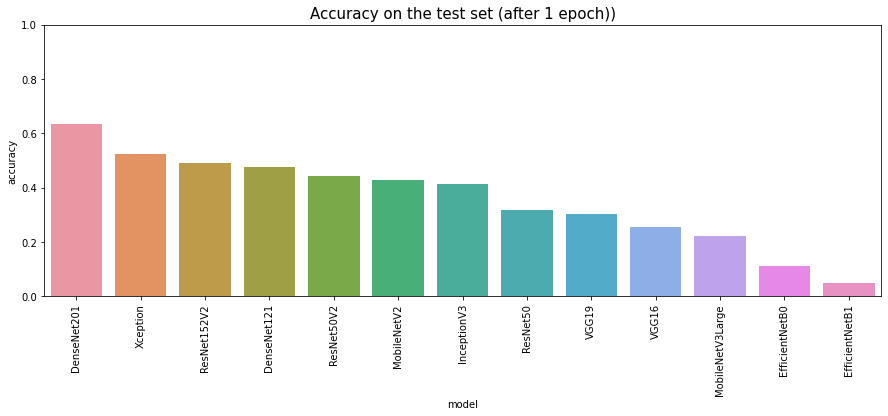

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'model', y = 'accuracy', data = df_results)
plt.title('Accuracy on the test set (after 1 epoch))', fontsize = 15)
plt.ylim(0,1)
plt.xticks(rotation=90)
plt.show()

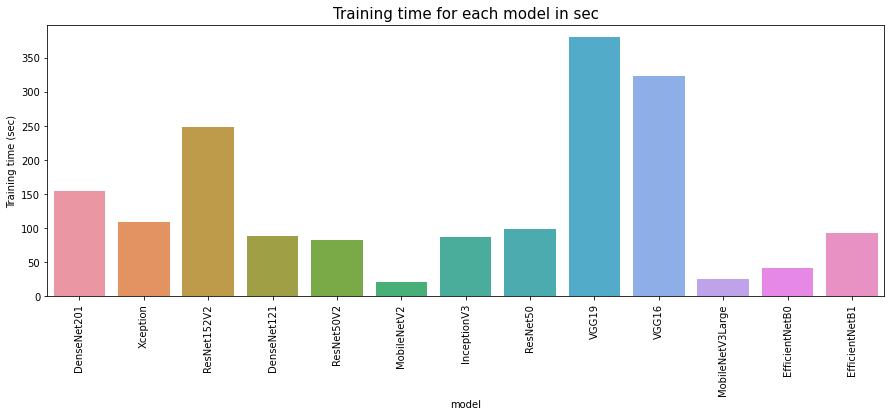

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'model', y = 'Training time (sec)', data = df_results)
plt.title('Training time for each model in sec', fontsize = 15)
# plt.ylim(0,20)
plt.xticks(rotation=90)
plt.show()

### 가장 좋은 성능이었던 DenseNet201의 성능을 재검증

In [ ]:
train_df,test_df = train_test_split(df, test_size=0.1, random_state=0)
train_generator,test_generator,train_images,val_images,test_images=create_gen()

model = get_model(tf.keras.applications.DenseNet201)
history = model.fit(train_images,validation_data=val_images,epochs=7)

Found 511 validated image filenames belonging to 7 classes.
Found 56 validated image filenames belonging to 7 classes.
Found 63 validated image filenames belonging to 7 classes.
Epoch 1/7
16/16 [==============================] - 138s 8s/step - loss: 1.6677 - accuracy: 0.3562 - val_loss: 1.4149 - val_accuracy: 0.4286
Epoch 2/7
16/16 [==============================] - 118s 7s/step - loss: 1.1333 - accuracy: 0.5773 - val_loss: 1.2595 - val_accuracy: 0.5893
Epoch 3/7
16/16 [==============================] - 122s 8s/step - loss: 0.9553 - accuracy: 0.6301 - val_loss: 1.2457 - val_accuracy: 0.5893
Epoch 4/7
16/16 [==============================] - 121s 8s/step - loss: 0.7475 - accuracy: 0.7143 - val_loss: 1.2315 - val_accuracy: 0.5714
Epoch 5/7
16/16 [==============================] - 122s 8s/step - loss: 0.6692 - accuracy: 0.7515 - val_loss: 1.3168 - val_accuracy: 0.5357
Epoch 6/7
16/16 [==============================] - 125s 8s/step - loss: 0.5724 - accuracy: 0.7886 - val_loss: 1.2415 - val

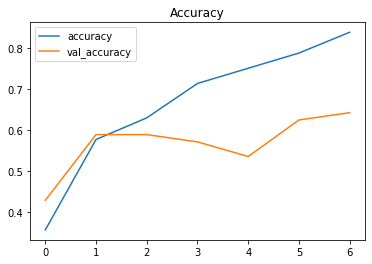

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

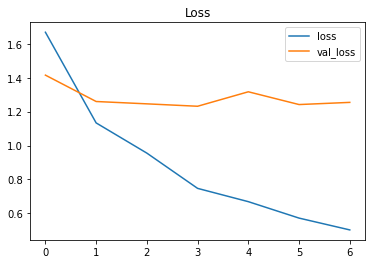

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# 테스트 이미지의 label 예측
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# 라벨 맵핑
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]
    
y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

2/2 [==============================] - 22s 7s/step
Accuracy on the test set: 61.90%


class_dictionary = {'americancasual': 0,
                    'casual': 1,
                    'dandy': 2,
                    'golf': 3,
                    'romantic': 4,
                    'sports': 5,
                    'street': 6}

# 모델 결과 확인

1/1 [==============================] - 4s 4s/step
## 예측률 : 55.32%
6


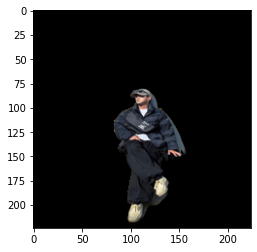

In [ ]:
# from PIL import Image
import pandas as pd
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
dir_path = '/content/drive/MyDrive/2023 KUIAI 해커톤/influ_man_half/@k_8_8bsoo_6_half.png'
test_image = image.load_img(dir_path, target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = test_image.reshape((1, test_image.shape[0], test_image.shape[1], test_image.shape[2]))
test_image = preprocess_input(test_image)
prediction = model.predict(test_image)
df = pd.DataFrame({'pred':prediction[0]})
df = df.sort_values(by='pred', ascending=False, na_position='first')
print(f"## 예측률 : {(df.iloc[0]['pred'])* 100:.2f}%")
print(df[df == df.iloc[0]].index[0])

# 최종 분류 모델 저장

In [ ]:
model.save('/content/drive/MyDrive/man_style_classificator_brand_new.h5')